# Team Value Analysis

## Setting Up

In [1]:
import pandas as pd
import calendar

teams = pd.read_csv("../datasets/bloodbowl_teams.csv")

# Default value
# teams = teams.fillna("")

## Exploring Data

In [2]:
teams

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,Dodge,G,ASP
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,Dodge|Pass,GP,AS
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,Catch|Dodge,GA,SP
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,Block|Dodge,GS,AP
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,NaN,G,ASP
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Wood Elf,Throwers,0,2,90000,7,3,4,7,Pass,GAP,S
100,Wood Elf,Wardancers,0,2,120000,8,3,4,7,Block|Dodge|Leap,GA,SP
101,Wood Elf,Treeman,0,1,120000,2,6,1,10,Loner|Mighty Blow|Stand Firm|Strong Arm|Take R...,S,GAP
102,Vampire,Thrall Linemen,0,16,40000,6,3,3,7,NaN,G,ASP


### Transforming Lists

In [3]:
def getList(value):
    """
    Splits values into a list.
    """
    result = []
    
    if value == value:
        result = value.split("|")
    
    return result

In [4]:
teams["skills"] = teams["skills"].apply(getList)
teams.head()

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,[Dodge],G,ASP
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,"[Dodge, Pass]",GP,AS
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,"[Catch, Dodge]",GA,SP
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,"[Block, Dodge]",GS,AP
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,[],G,ASP


# Derived Values

In [5]:
def getCostByAttrPoint(group):
    """
    Returns the cost by point for attributes.
    """
    return group["cost"] / group["attribute_sum"]

In [6]:
teams["attribute_sum"] = teams.apply(lambda x: x["ma"] + x["st"] + x["ag"] + x["av"], axis=1)
teams["skill_count"] = teams.apply(lambda x: len(x["skills"]), axis=1)
teams["attr_point_cost"] = teams.apply(getCostByAttrPoint, axis=1)
teams

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double,attribute_sum,skill_count,attr_point_cost
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,[Dodge],G,ASP,19,1,2631.578947
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,"[Dodge, Pass]",GP,AS,19,2,3684.210526
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,"[Catch, Dodge]",GA,SP,19,2,3684.210526
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,"[Block, Dodge]",GS,AP,19,2,4736.842105
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,[],G,ASP,19,0,2105.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Wood Elf,Throwers,0,2,90000,7,3,4,7,[Pass],GAP,S,21,1,4285.714286
100,Wood Elf,Wardancers,0,2,120000,8,3,4,7,"[Block, Dodge, Leap]",GA,SP,22,3,5454.545455
101,Wood Elf,Treeman,0,1,120000,2,6,1,10,"[Loner, Mighty Blow, Stand Firm, Strong Arm, T...",S,GAP,19,7,6315.789474
102,Vampire,Thrall Linemen,0,16,40000,6,3,3,7,[],G,ASP,19,0,2105.263158


# Average Attributes

## Profile Average

In [7]:
teams_average_attributes = teams[["team", "ma", "st", "ag", "av", "attribute_sum", "cost", "attr_point_cost"]]
teams_average_attributes = teams_average_attributes.groupby("team").mean()
teams_average_attributes = teams_average_attributes.sort_values(["attribute_sum", "cost"], ascending=False)
teams_average_attributes

,ma,st,ag,av,attribute_sum,cost,attr_point_cost
team,,,,,,,
High Elf,6.750000,3.000000,4.000000,7.750000,21.500000,87500.000000,4063.852814
Dark Elf,6.600000,3.000000,4.000000,7.400000,21.000000,90000.000000,4285.281385
Elven Union,6.750000,3.000000,4.000000,7.250000,21.000000,85000.000000,4011.363636
Wood Elf,6.400000,3.400000,3.400000,7.600000,20.800000,98000.000000,4735.019367
Skaven,7.200000,3.200000,3.000000,7.400000,20.800000,88000.000000,4212.987013
Vampire,6.000000,3.500000,3.500000,7.500000,20.500000,75000.000000,3552.631579
Human,6.400000,3.200000,2.800000,8.000000,20.400000,82000.000000,3990.476190
Chaos Chosen,5.333333,4.000000,2.666667,8.333333,20.333333,103333.333333,5087.301587
Lizardmen,6.666667,3.666667,1.666667,8.333333,20.333333,93333.333333,4555.555556


## Team (Weighted) Average

In [8]:
teams_range = teams[["team", "min", "max"]]
teams_range = teams_range.groupby("team").sum()
teams_range

,min,max
team,,
Amazon,0,24
Chaos Chosen,0,21
Chaos Dwarf,0,25
Chaos Renegades,0,19
Dark Elf,0,26
Dwarf,0,23
Elven Union,0,24
Goblin,0,24
Halfling,0,18


In [9]:
def weighted_average(group):
   # weights = group['Volume']
   # height = group['Height']   
   # return np.average(height,weights=weights)
   proportion = group["max"] / teams_range["max"][group["team"]]
   group["ma"] = group["ma"] * proportion
   group["st"] = group["st"] * proportion
   group["ag"] = group["ag"] * proportion
   group["av"] = group["av"] * proportion
   group["attribute_sum"] = group["attribute_sum"] * proportion
   group["cost"] = group["cost"] * proportion
   group["attr_point_cost"] = group["attr_point_cost"] * proportion
   return group

In [10]:
teams_attributes_weighted = teams[["team", "ma", "st", "ag", "av", "attribute_sum", "cost", "min", "max", "attr_point_cost"]]
teams_attributes_weighted = teams_attributes_weighted.apply(weighted_average, axis=1)
teams_attributes_weighted = teams_attributes_weighted.drop("min", 1)
teams_attributes_weighted = teams_attributes_weighted.drop("max", 1)
teams_attributes_weighted

,team,ma,st,ag,av,attribute_sum,cost,attr_point_cost
0,Amazon,4.000000,2.000000,2.000000,4.666667,12.666667,33333.333333,1754.385965
1,Amazon,0.500000,0.250000,0.250000,0.583333,1.583333,5833.333333,307.017544
2,Amazon,0.500000,0.250000,0.250000,0.583333,1.583333,5833.333333,307.017544
3,Amazon,1.000000,0.500000,0.500000,1.166667,3.166667,15000.000000,789.473684
4,Chaos Dwarf,3.840000,1.920000,1.920000,4.480000,12.160000,25600.000000,1347.368421
...,...,...,...,...,...,...,...,...
99,Wood Elf,0.560000,0.240000,0.320000,0.560000,1.680000,7200.000000,342.857143
100,Wood Elf,0.640000,0.240000,0.320000,0.560000,1.760000,9600.000000,436.363636
101,Wood Elf,0.080000,0.240000,0.040000,0.400000,0.760000,4800.000000,252.631579
102,Vampire,4.363636,2.181818,2.181818,5.090909,13.818182,29090.909091,1531.100478


In [11]:
teams_average_attributes_weighted = teams_attributes_weighted
teams_average_attributes_weighted = teams_average_attributes_weighted.groupby("team").mean()
teams_average_attributes_weighted = teams_average_attributes_weighted.sort_values(["attribute_sum", "cost"], ascending=False)
teams_average_attributes_weighted

,ma,st,ag,av,attribute_sum,cost,attr_point_cost
team,,,,,,,
Vampire,3.000000,1.636364,1.636364,3.636364,9.909091,29545.454545,1447.368421
Halfling,2.333333,1.222222,1.388889,3.222222,8.166667,20000.000000,1184.210526
Ogre,2.500000,1.045455,1.363636,3.045455,7.954545,26363.636364,1428.571429
Chaos Chosen,1.920635,1.095238,0.984127,2.730159,6.730159,23968.253968,1183.295540
Lizardmen,2.463768,0.884058,0.797101,2.536232,6.681159,22898.550725,1140.096618
High Elf,1.604167,0.750000,1.000000,1.958333,5.312500,19375.000000,909.992785
Elven Union,1.604167,0.750000,1.000000,1.770833,5.125000,17916.666667,866.477273
Nurgle,1.240000,0.810000,0.690000,2.050000,4.790000,15400.000000,802.105263
Amazon,1.500000,0.750000,0.750000,1.750000,4.750000,15000.000000,789.473684


# Visualization

In [12]:
team_costs_average = teams_average_attributes[["attr_point_cost"]]
team_costs_average = team_costs_average.sort_values(["team"])
team_costs_average

,attr_point_cost
team,
Amazon,3684.210526
Chaos Chosen,5087.301587
Chaos Dwarf,4921.157059
Chaos Renegades,4126.461988
Dark Elf,4285.281385
Dwarf,4832.323232
Elven Union,4011.363636
Goblin,3357.821637
Halfling,4095.394737


In [13]:
team_costs_weighted = teams_average_attributes_weighted[["attr_point_cost"]]
team_costs_weighted = team_costs_weighted.sort_values(["team"])
team_costs_weighted

,attr_point_cost
team,
Amazon,789.473684
Chaos Chosen,1183.295540
Chaos Dwarf,768.984962
Chaos Renegades,398.103263
Dark Elf,758.541459
Dwarf,830.390865
Elven Union,866.477273
Goblin,343.673855
Halfling,1184.210526


In [14]:
team_costs = team_costs_average.merge(team_costs_weighted, on="team")
team_costs.rename(columns={'attr_point_cost_x': 'average_profile_cost', 'attr_point_cost_y': 'average_team_cost'}, inplace=True)
team_costs

,average_profile_cost,average_team_cost
team,,
Amazon,3684.210526,789.473684
Chaos Chosen,5087.301587,1183.295540
Chaos Dwarf,4921.157059,768.984962
Chaos Renegades,4126.461988,398.103263
Dark Elf,4285.281385,758.541459
Dwarf,4832.323232,830.390865
Elven Union,4011.363636,866.477273
Goblin,3357.821637,343.673855
Halfling,4095.394737,1184.210526


In [15]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [16]:
team_costs = normalize(team_costs)
team_costs

,average_profile_cost,average_team_cost
team,,
Amazon,0.188721,0.403916
Chaos Chosen,1.000000,0.760737
Chaos Dwarf,0.903934,0.385352
Chaos Renegades,0.444434,0.049316
Dark Elf,0.536265,0.375890
Dwarf,0.852569,0.440989
Elven Union,0.377884,0.473685
Goblin,0.000000,0.000000
Halfling,0.426471,0.761566


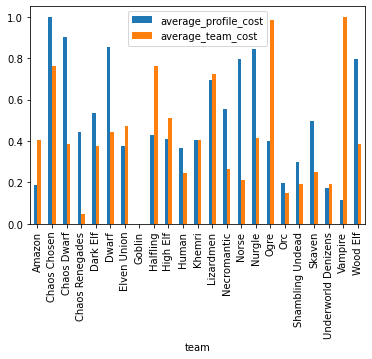

In [17]:
team_costs.plot.bar();